In [1]:
from models import *
from utils import *
import torch
import torchinfo
import torchvision

%reload_ext autoreload
%autoreload 2

In [2]:
# load dataset
train_dataset = torchvision.datasets.MNIST(root='../datasets', train=True, download=True, transform=torchvision.transforms.ToTensor())
val_dataset = torchvision.datasets.MNIST(root='../datasets', train=False, download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True, pin_memory=True)
model_name = 'AE_2'


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

model = BasicAutoencoder((1, 28, 28), 32, [512, 256]).to(device)
torchinfo.summary(model, input_size=(1, 1, 28, 28))

opt = torch.optim.Adam(model.parameters())
loss_fn = torch.nn.MSELoss()

history = train(model, device, train_loader, val_loader, opt, loss_fn, 50, model_name)
history.to_csv(os.path.join('histories', f'{model_name}.history.csv'))


Epoch 1: Train loss: 0.032888, Validation loss: 0.01756610174328089
Epoch 2: Train loss: 0.014787, Validation loss: 0.01211087346225977
Epoch 3: Train loss: 0.011008, Validation loss: 0.00969381265193224
Epoch 4: Train loss: 0.009180, Validation loss: 0.00842365803271532
Epoch 5: Train loss: 0.008024, Validation loss: 0.0076281048454344275
Epoch 6: Train loss: 0.007257, Validation loss: 0.0069354650773108
Epoch 7: Train loss: 0.006735, Validation loss: 0.0066307410903275014
Epoch 8: Train loss: 0.006332, Validation loss: 0.0062911141604185105
Epoch 9: Train loss: 0.005990, Validation loss: 0.006244632583856583
Epoch 10: Train loss: 0.005737, Validation loss: 0.005818238584697246
Epoch 11: Train loss: 0.005514, Validation loss: 0.005713387846946716
Epoch 12: Train loss: 0.005351, Validation loss: 0.005682733663916588
Epoch 13: Train loss: 0.005199, Validation loss: 0.005471489729732275
Epoch 14: Train loss: 0.005061, Validation loss: 0.005296486411988735
Epoch 15: Train loss: 0.004933, 

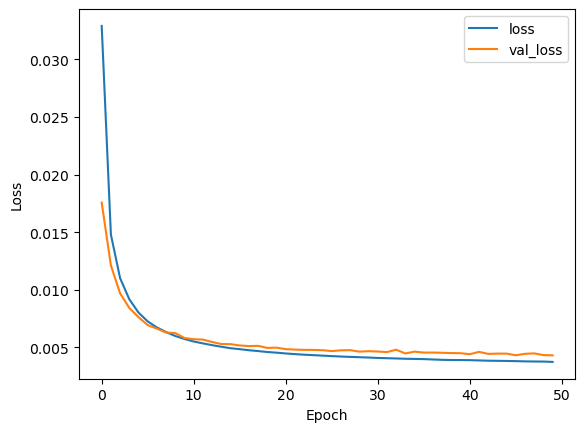

In [4]:
plot_history(model_name)

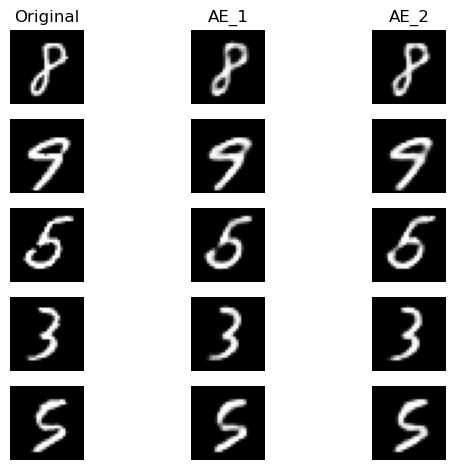

In [9]:
test_batch = next(iter(val_loader))[0][:5]
models = load_models('AE_1', model_name, kind='best')
show_examples(test_batch, models)